# Proyecto final Aprendizaje automático con Python


Bienvenido al proyecto final, Clasificador de predicción de precipitaciones. En este proyecto, aplicarás los conocimientos y habilidades aprendidos en este curso para construir un clasificador de Aprendizaje automático que prediga las precipitaciones basándose en datos meteorológicos históricos.

Demostrarás tus habilidades en Ciencia de datos y Aprendizaje automático realizando las siguientes tareas, cada una de las cuales incluye pasos específicos:

Explorar y preparar el conjunto de datos: Ingeniería de características y limpieza.

Construir un canal de clasificación: Selección, entrenamiento y optimización del modelo.

Evaluar el rendimiento del modelo: Interpretar métricas y visualizaciones.

Imagínese que es un científico de datos de WeatherTech Inc. responsable de crear un modelo que pueda predecir si lloverá o no mañana basándose en datos meteorológicos históricos. El conjunto de datos proporcionado incluye varias características meteorológicas como la temperatura, la humedad y la velocidad del viento.

# Proyecto Final: Construcción de un Clasificador de Predicción de Lluvia ☔

**Tiempo estimado:** 60 minutos
---

## 🎯 Objetivos

Al completar este laboratorio, serás capaz de:

- Explorar y realizar ingeniería de características sobre un conjunto de datos del mundo real.
- Construir un pipeline de clasificación y optimizarlo utilizando validación cruzada con búsqueda en malla (*grid search*).
- Evaluar tu modelo interpretando diversas métricas de rendimiento y visualizaciones.
- Implementar un clasificador distinto actualizando tu pipeline.
- Utilizar un conjunto adecuado de parámetros para realizar la búsqueda eada caso.

---

## 📝 Instrucciones

Una vez que completes el Notebook:

1. Descárgalo usando **Archivo > Descargar**.
2. Este notebook será evaluado mediante un sistema de calificación automática en la siguiente sección.
3. Copia y pega tus respuestas en Markdown en la sección correspondiente de

# 🌦️ Sobre el Conjunto de Datos

El origen original de los datos proviene del **Buró de Meteorología del Gobierno Australiano**, y los datos más recientes pueden consultarse en:  
👉 [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/)

El conjunto de datos utilizado en este proyecto fue descargado desde Kaggle:  
👉 [https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)

Las definiciones de las columnas fueron obtenidas desde:  
👉 [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml)

Este conjunto contiene observaciones diarias de métricas meteorológicas desde **2008 hasta 2017**, incluyendo los siguientes campos:

| Campo           | Descripción                                                                 | Unidad             | Tipo     |
|-----------------|------------------------------------------------------------------------------|--------------------|----------|
| `Date`          | Fecha de la observación en formato AAAA-MM-DD                               | Fecha              | `object` |
| `Location`      | Ubicación de la observación                                                 | Localidad          | `object` |
| `MinTemp`       | Temperatura mínima                                                          | Celsius            | `float`  |
| `MaxTemp`       | Temperatura máxima                                                          | Celsius            | `float`  |
| `Rainfall`      | Cantidad de lluvia                                                          | Milímetros         | `float`  |
| `Evaporation`   | Cantidad de evaporación                                                     | Milímetros         | `float`  |
| `Sunshine`      | Cantidad de horas de sol brillante                                          | Horas              | `float`  |
| `WindGustDir`   | Dirección de la ráfaga más fuerte                                           | Puntos cardinales  | `object` |
| `WindGustSpeed` | Velocidad de la ráfaga más fuerte                                           | Kilómetros/Hora    | `object` |
| `WindDir9am`    | Dirección del viento promedio 10 minutos antes de las 9am                   | Puntos cardinales  | `object` |
| `WindDir3pm`    | Dirección del viento promedio 10 minutos antes de las 3pm                   | Puntos cardinales  | `object` |
| `WindSpeed9am`  | Velocidad del viento promedio 10 minutos antes de las 9am                   | Kilómetros/Hora    | `float`  |
| `WindSpeed3pm`  | Velocidad del viento promedio 10 minutos antes de las 3pm                   | Kilómetros/Hora    | `float`  |
| `Humidity9am`   | Humedad relativa a las 9am                                                  | Porcentaje         | `float`  |
| `Humidity3pm`   | Humedad relativa a las 3pm                                                  | Porcentaje         | `float`  |
| `Pressure9am`   | Presión atmosférica reducida al nivel del mar a las 9am                     | Hectopascal        | `float`  |
| `Pressure3pm`   | Presión atmosférica reducida al nivel del mar a las 3pm                     | Hectopascal        | `float`  |
| `Cloud9am`      | Fracción del cielo cubierta por nubes a las 9am                             | Octavos            | `float`  |
| `Cloud3pm`      | Fracción del cielo cubierta por nubes a las 3pm                             | Octavos            | `float`  |
| `Temp9am`       | Temperatura a las 9am                                                       | Celsius            | `float`  |
| `Temp3pm`       | Temperatura a las 3pm                                                       | Celsius            | `float`  |
| `RainToday`     | Si hubo al menos 1mm de lluvia hoy                                          | Sí/No              | `object` |
| `RainTomorrow`  | Si habrá al menos 1mm de lluvia mañana                                      | Sí/No              | `object` |


## Install and import the required libraries

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

## Load the data

In [3]:
df = pd.read_csv("weatherAUS_2.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## ☀️ La cantidad de sol y la cobertura de nubes parecen ser características importantes, pero tienen muchos valores faltantes, demasiados como para imputarlos de manera confiable.


### 🧹 Eliminación de Filas con Valores Faltantes

Para mantener las cosas simples, eliminaremos todas las filas que contienen valores faltantes y observaremos qué queda disponible en el conjunto de datos.

In [4]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3p

Since we still have 56k observations left after dropping missing values, we may not need to impute any missing values.
Let's see how we do.

📊 Como aún nos quedan 56 mil observaciones después de eliminar los valores faltantes, puede que no sea necesario imputar ningún valor ausente.  
Veamos cómo nos va.

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## 🔐 Consideraciones sobre Fugas de Datos (Data Leakage)

### 📌 Enunciado Original

> Data leakage considerations  
> Consider the descriptions above for the columns in the data set. Are there any practical limitations to being able to predict whether it will rain tomorrow given the available data?

### 📘 Traducción Literal

**Consideraciones sobre fugas de datos**  
Considera las descripciones anteriores de las columnas en el conjunto de datos. ¿Existen limitaciones prácticas para poder predecir si lloverá mañana, dado los datos disponibles?

---

## 📍 Puntos a Tener en Cuenta - 1

### 📌 Enunciado Original

> List some of the features that would be inefficient in predicting tomorrow's rainfall. There will be a question in the quiz that follows based on this observation.

### 📘 Traducción Literal

Enumera algunas de las características (columnas) que serían ineficientes para predecir la lluvia de mañana. Habrá una pregunta en el cuestionario que sigue basada en esta observación.


## 🌧️ Columnas Ineficientes para Predecir la Lluvia de Mañana

Estas columnas pueden ser poco útiles o incluso causar problemas como fuga de datos:

- `Date`: Aunque puede usarse para extraer estacionalidad, por sí sola no aporta información meteorológica directa.
- `RainTomorrow`: Es la variable objetivo. Incluirla como predictor causaría fuga de datos.
- `Evaporation`: Su variabilidad diaria es baja y suele ser más útil en estudios climáticos de largo plazo.
- `Sunshine`: Aunque puede tener correlación negativa con la lluvia, no es un predictor directo.
- `WindDir9am`, `WindDir3pm`: Son categóricas y su relación con la lluvia no es directa. Requieren codificación y pueden introducir ruido.
- `Location`: Puede ser útil en modelos geográficos, pero si el modelo no está diseñado para múltiples ubicaciones, puede ser irrelevante o causar sob

## 🔄 Cambio de Enfoque y Renombramiento de Columnas

### 📘 Traducción Literal del Enunciado

> Si ajustamos nuestro enfoque y apuntamos a predecir la lluvia de hoy utilizando datos meteorológicos históricos hasta e incluyendo ayer, entonces podemos utilizar legítimamente todas las características disponibles. Este cambio sería particularmente útil para aplicaciones prácticas, como decidir si ir en bicicleta al trabajo hoy.

> Con este nuevo objetivo, deberíamos actualizar los nombres de las columnas de lluvia para evitar confusión.r específico.



In [6]:
df = df.rename(columns={'RainToday': 'RainYesterday',
                        'RainTomorrow': 'RainToday'
                        })

## 🎯 Justificación
Este cambio permite construir un modelo que predice la lluvia de hoy usando solo datos hasta ayer, lo cual es útil para aplicaciones prácticas como decidir si salir en bicicleta esta mañana. Además, evita la fuga de datos, ya que no se usan variables que dependen del día completo actual.



## 📏 Granularidad de los Datos

¿Tendrían los patrones meteorológicos la misma capacidad de predicción en ubicaciones muy diferentes dentro de Australia? Yo diría que no.  
La probabilidad de lluvia en una ubicación puede ser mucho mayor que en otra.  
Usar todas las ubicaciones requiere un modelo más complejo, ya que debe adaptarse a los patrones climáticos locales.  
Veamos cuántas observaciones tenemos para cada ubicación y evaluemos si podemos reducir nuestra atención a una región más pequeña.

---

## 📍 Selección de Ubicación

Podrías investigar para agrupar las ciudades de la columna `Location` según la distancia, lo cual ya he hecho por ti detrás de escena.  
Encontré que Watsonia está a solo 15 km de Melbourne, y que el Aeropuerto de Melbourne está a solo 18 km de Melbourne.  
Agrupemos estas tres ubicaciones y usemos solo sus datos meteorológicos para construir nuestro modelo de predicción localizado.  
Como aún podría haber ligeras variaciones en los patrones climáticos, mantendremos `Location` como una variable categórica.


In [7]:
df = df[df.Location.isin(['Melbourne','MelbourneAirport','Watsonia',])]
df. info()

<class 'pandas.core.frame.DataFrame'>
Index: 7557 entries, 64191 to 80997
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7557 non-null   object 
 1   Location       7557 non-null   object 
 2   MinTemp        7557 non-null   float64
 3   MaxTemp        7557 non-null   float64
 4   Rainfall       7557 non-null   float64
 5   Evaporation    7557 non-null   float64
 6   Sunshine       7557 non-null   float64
 7   WindGustDir    7557 non-null   object 
 8   WindGustSpeed  7557 non-null   float64
 9   WindDir9am     7557 non-null   object 
 10  WindDir3pm     7557 non-null   object 
 11  WindSpeed9am   7557 non-null   float64
 12  WindSpeed3pm   7557 non-null   float64
 13  Humidity9am    7557 non-null   float64
 14  Humidity3pm    7557 non-null   float64
 15  Pressure9am    7557 non-null   float64
 16  Pressure3pm    7557 non-null   float64
 17  Cloud9am       7557 non-null   float64
 18  Cloud3pm

## 📘 Relación con el Enunciado
Según el enunciado original:

“Agrupemos estas tres ubicaciones y usemos solo sus datos meteorológicos para construir nuestro modelo de predicción localizado.”

Este código implementa exactamente esa idea: reducir la granularidad geográfica para enfocarse en una región específica (Melbourne y alrededores), lo que permite construir un modelo más preciso y adaptado a patrones climáticos locales.

Además, como se mencionó en el enunciado, se mantendrá la columna Location como variable categórica para capturar pequeñas diferencias entre las tres zonas.


## 📊 Traducción Literal

> We still have 7557 records, which should be enough to build a reasonably good model.  
> You could always gather more data if needed by partitioning the data into similar locations or simply by updating it from the source to include a larger time frame.

**Todavía tenemos 7557 registros, lo cual debería ser suficiente para construir un modelo razonablemente bueno.**  
Siempre podrías recopilar más datos si fuera necesario, ya sea dividiendo el conjunto en ubicaciones similares o simplemente actualizándolo desde la fuente para incluir un período de tiempo más a


## 🍂 Extracción de una Característica Estacional

> Ahora considera la columna `Date`. Esperamos que los patrones climáticos sean estacionales, teniendo diferentes niveles de predictibilidad en invierno y verano, por ejemplo.  
> Puede haber algo de variación con el año también, pero lo dejaremos fuera por ahora.  
> Vamos a crear una nueva característica llamada `Season` a partir de `Date` y luego eliminaremos `Date`, ya que probablemente sea menos informativa que la estación.  
> Una forma sencilla de hacerlo es definir una función que asigne estaciones a los meses dados, y luego usar esa función para transformar la columna `Dte`.
mplio.


## 🌦️ Crear una función para asignar estaciones según la fecha

In [8]:
def date_to_season(date):
    month = date.month
    if (month == 12) or (month == 1) or (month == 2):
        return 'Summer'
    elif (month == 3) or (month == 4) or (month == 5):
        return 'Autumn'
    elif (month == 6) or (month == 7) or (month == 8):
        return 'Winter'
    elif (month == 9) or (month == 10) or (month == 11):
        return 'Spring'

## 🧠 ¿Qué hace esta función?

Extrae el número de mes desde un objeto date.

Asigna una estación del año según el mes:

Diciembre, Enero, Febrero → 'Summer' (verano)

Marzo, Abril, Mayo → 'Autumn' (otoño)

Junio, Julio, Agosto → 'Winter' (invierno)

Septiembre, Octubre, Noviembre → 'Spring' (primavera)

Esta lógica está basada en el calendario del hemisferio sur, como en Chile o Australia.

## 🧪 Ejercicio 1: Mapear fechas a estaciones y eliminar la columna Date


In [9]:
## Convertimos la columna `'Date'` a formato datetime, aplicamos la función `date_to_season`, y luego eliminamos la columna original.

# Convertir la columna 'Date' a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Aplicar la función personalizada para asignar estaciones
df['Season'] = df['Date'].apply(date_to_season)

# Eliminar la columna 'Date' ya que la estación es más informativa
df = df.drop(columns=['Date'])

# Mostrar el DataFrame actualizado
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainYesterday,RainToday,Season
64191,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,SW,...,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes,Summer
64192,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,SSE,...,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No,Summer
64193,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,S,...,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No,Summer
64194,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,SSE,...,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No,Summer
64195,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,SSE,...,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80992,Watsonia,3.6,14.5,0.0,2.4,8.8,NNE,41.0,ENE,NNE,...,66.0,1028.4,1025.0,1.0,7.0,5.2,13.8,No,No,Winter
80994,Watsonia,4.8,13.3,0.4,0.6,0.0,NNW,24.0,NE,NNE,...,63.0,1028.5,1025.1,7.0,7.0,5.6,12.4,No,No,Winter
80995,Watsonia,5.6,13.1,0.0,1.6,6.0,NNW,52.0,NE,N,...,67.0,1019.0,1014.0,1.0,7.0,8.8,11.6,No,Yes,Winter
80996,Watsonia,6.9,12.1,3.2,1.8,5.6,SSW,24.0,WNW,SW,...,61.0,1018.7,1017.3,2.0,7.0,7.9,11.0,Yes,No,Winter


Parece que tenemos un buen conjunto de características con las que trabajar.

Sigamos adelante y construyamos nuestro modelo.

Pero espera, echemos un vistazo a qué tan equilibrado está nuestro objetivo.


### Ejercicio 2. Define los DataFrames de características y objetivo Completa el siguiente código:

Dado que la variable objetivo es RainToday, y queremos usar el resto de las columnas como características (excepto RainToday), el código completo sería:

In [11]:
X = df.drop(columns='RainToday', axis=1)
y = df['RainToday']

## 🧪 Ejercicio 3. ¿Qué tan equilibradas están las clases?

Muestra el conteo de cada clase.

Como queremos ver cuántas veces aparece cada clase en la variable objetivo RainToday, el código sería:

In [12]:
df['RainToday'].value_counts()

RainToday
No     5766
Yes    1791
Name: count, dtype: int64

### 📊 Interpretación técnica

La clase "No" representa aproximadamente el 76% de los datos.

La clase "Yes" representa el 24% restante.

Esto indica un desbalance moderado en la variable objetivo RainToday, lo cual puede afectar el rendimiento de algunos modelos de clasificación si no se ajusta adecuadamente (por ejemplo, con técnicas como class_weight, SMOTE, o métricas ajustadas como F1-score).

## 🧪 Ejercicio 4. ¿Qué puedes concluir de estos conteos?

## 📊 Ejercicio 4 – Análisis del balance de clases en `RainToday`

### 🔍 Conclusiones a partir de los conteos

- En el conjunto de datos, hay **5766 días sin lluvia** (`No`) y **1791 días con lluvia** (`Yes`).
- Esto implica que **aproximadamente el 24% de los días** presentan lluvia en el área de Melbourne.
- Por lo tanto, **llueve alrededor de 1 de cada 4 días** en promedio.

---

### 🎯 Precisión si se asume "No llueve"

- Si se construyera un modelo que **siempre predice "No"**, tendría una precisión de:

  

\[
  \text{Precisión} = \frac{5766}{5766 + 1791} \approx 76.3\%
  \]



- Aunque esta precisión parece alta, el modelo **no aprendería nada útil** sobre los patrones reales de lluvia. Sería un caso claro de **modelo sesgado por clase mayoritaria**.

---

### ⚖️ ¿Está equilibrado el conjunto de datos?

- No. El conjunto está **moderadamente desbalanceado**, con una proporción de aproximadamente **3:1** entre clases.
- Este desbalance puede afectar modelos como regresión logística o árboles sin ajuste, generando **predicciones sesgadas**e ar el impacto del desbalance en distintos modelos.

### 🧪 Ejercicio 5. Dividir los datos en conjuntos de entrenamiento y prueba, asegurando la estratificación del objetivo

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


### 🧪 Ejercicio 6. Definir transformadores de preprocesamiento para características numéricas y categóricas


Detecta automáticamente las columnas numéricas y categóricas y asígnalas a las listas de características numéricas y categóricas.

Completa el siguiente código:

In [14]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()


### Definir transformadores separados para cada tipo de característica y combinarlos en un único transformador de preprocesamiento

In [15]:
# Scale the numeric features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# One-hot encode the categoricals 
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

## 🧪 Ejercicio 7. Combinar los transformadores en un único transformador de columnas de preprocesamiento

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


### 🧪 Ejercicio 8. Crear un pipeline combinando el preprocesamiento con un clasificador Random Forest

In [18]:

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


### 🧪  Definir una cuadrícula de hiperparámetros para usar en un optimizador de búsqueda en cuadrícula con validación cruzada

In [19]:
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

### 🧪Uso del pipeline en validación cruzada


Recuerda que el pipeline se utiliza repetidamente dentro de la validación cruzada, ajustándose en cada subconjunto de entrenamiento interno y prediciendo en su correspondiente subconjunto de validación. 

Realiza una búsqueda en cuadrícula con validación cruzada y ajusta el mejor modelo a los datos de entrenamiento. Selecciona un método de validación cruzada, asegurando la estratificación del objetivo durante la validación.

In [25]:
cv = StratifiedKFold(n_splits=5, shuffle=True)

## 🧪 Ejercicio 9. Instanciar y ajustar GridSearchCV al pipeline

Ejercicio 9. Instancia y ajusta GridSearchCV al pipeline

Completa el siguiente código:

In [27]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,  # 
    scoring='f1',
    n_jobs=-1
)

# Ajuste del modelo óptimo
grid_search.fit(X_train, y_train)

/home/5c4bc6af-59e4-4b86-8252-acdc575686b6/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/5c4bc6af-59e4-4b86-8252-acdc575686b6/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/5c4bc6af-59e4-4b86-8252-acdc575686b6/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/5c4bc6af-59e4-4b86-8252-acdc575686b6/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
  File "/home/5c4bc6af-59e4-4b86-8252-acdc575686b6/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MinTemp',
                                                                          'MaxTemp',
                                                                          'Rainfall',
                                                                          'Evaporation',
                                                                          'Sunshine',
                                                                          'WindGustSpeed',
                                                                          'WindSpeed9am',
                                                                          'WindSpeed3pm',
                                                                          'Humidity9am',
                                                                          'Humidity3pm',
                                                                          'Pressure9am',
                                                                          'Pr...
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Location',
                                                                          'WindGustDir',
                                                                          'WindDir9am',
                                                                          'WindDir3pm',
                                                                          'RainYesterday',
                                                                          'Season'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100]},
             scoring='f1')

## 🏆 Mejores parámetros y puntaje de validación cruzada

In [28]:
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best cross-validation score: nan


## 🧪 Exercise 10: Display your model's estimated score

In [31]:
## 🧪 Exercise 10: Display your model's estimated score

# ✅ Evaluación del modelo óptimo sobre el conjunto de prueba
from sklearn.metrics import f1_score

# 🔍 Predicción sobre el conjunto de prueba
y_pred = grid_search.best_estimator_.predict(X_test)

# ✅ Cálculo del f1-score con clase positiva explícita
test_score = f1_score(y_test, y_pred, pos_label='Yes')
print("Test set f1-score: {:.2f}".format(test_score))


Test set f1-score: 0.62


Eso significa que el modelo entrenado con los mejores hiperparámetros encontrados por GridSearchCV logra un F1-score de 0.62 sobre el conjunto de prueba, lo cual es bastante razonable considerando el desbalance de clases que vimos antes.

Así que tenemos un clasificador razonablemente preciso, que se espera que prediga correctamente alrededor del 84% de las veces si lloverá hoy en el área de Melbourne. Pero cuidado aquí. Veamos los resultados con más profundidad. El mejor modelo está almacenado dentro del objeto gridsearch.

### Ejercicio 11. Obtén las predicciones del modelo desde el estimador de búsqueda en cuadrícula (grid search) sobre los datos no vistos Completa el siguiente código: y_pred = grid_search.predict(...)

In [32]:
y_pred = grid_search.predict(X_test)


## Ejercicio 12. Imprime el reporte de clasificación** 

In [33]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.95      0.91      1154
         Yes       0.77      0.51      0.62       358

    accuracy                           0.85      1512
   macro avg       0.81      0.73      0.76      1512
weighted avg       0.84      0.85      0.84      1512




## 📊 Explicación de columnas en el reporte de clasificación

| Columna     | Propósito técnico | Interpretación aplicada |
|-------------|-------------------|--------------------------|
| **Clase**   | Etiqueta de la categoría que se está evaluando. | `'No'` = día sin lluvia, `'Yes'` = día con lluvia. |
| **Precision** | Proporción de predicciones correctas entre todas las veces que el modelo predijo esa clase. | De todos los días que el modelo dijo que llovería (`'Yes'`), el 77% realmente llovieron. |
| **Recall**    | Proporción de verdaderos positivos entre todos los casos reales de esa clase. | De todos los días que realmente llovieron, el modelo detectó el 51%. |
| **F1-score**  | Media armónica entre precision y recall. Mide el equilibrio entre ambos. | Para `'Yes'`, el modelo tiene un rendimiento global de 0.62 al detectar lluvia. |
| **Soporte**   | Número de muestras reales de cada clase en el conjunto de prueba. | Hubo 358 días con lluvia y 1154 días sin lluvia en el conjunto de prueba. |

---

### 🧠 Reflexión crítica

- **Precision alta pero recall bajo** en `'Yes'` indica que el modelo **es conservador**: solo predice lluvia cuando está bastante seguro, pero **se le escapan muchos días lluviosos**.
- El **F1-score** ayuda a equilibrar ambos aspectos, y es especialmente útil cuando las clases están desbalanceadas.
- El **soporte** permite entender el peso estadístico de cada clase en el conjunto de prueba.

---


## 📊 Resultados obtenidos – Reporte de clasificación

| Clase | Precision | Recall | F1-score | Soporte |
|-------|-----------|--------|----------|---------|
| No    | 0.86      | 0.95   | 0.90     | 1154    |
| Yes   | 0.77      | 0.51   | 0.62     | 358     |

**Accuracy global:** 0.85 (sobre 1512 muestras)  
**Promedio macro:** Precision 0.81, Recall 0.73, F1-score 0.76  
**Promedio ponderado:** Precision 0.84, Recall 0.85, F1-score 0.84

---

## 🧠 Interpretación crítica

- El modelo predice muy bien los días secos (`'No'`), con un **recall de 0.95**.
- Sin embargo, **pierde sensibilidad para detectar lluvia** (`'Yes'`), con un **recall de solo 0.51**.
- Esto indica que **casi la mitad de los días con lluvia no son detectados**, lo cual puede ser crítico en aplicaciones reales (por ejemplo, alertas meteorológicas o planificación agrícola).
- El **F1-score de 0.62 para `'Yes'`** refleja este desequilibrio: el modelo es más conservador al predecir lluvia, priorizando precisión sobre cobertura.

---



## Ejercicio 13. Grafica la matriz de confusión**  
> **Completa el siguiente código:**  
> `conf_matrix = ...(y_test, y_pred)`  
> `disp = ConfusionMatrixDisplay(confusion_matrix=...)`  
> `disp.plot(cmap='Blues')`  
> `plt.title('Confusion Matrix')`  
> `plt.show()`

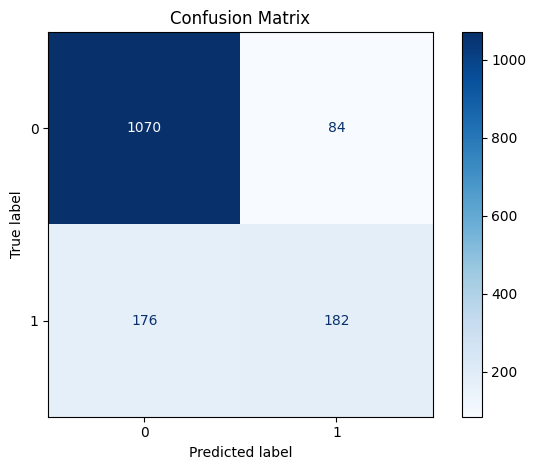

In [40]:
# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear objeto de visualización
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

# Graficar
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

## 📊 Resultados obtenidos – Matriz de confusión

|                 | Predicción `'No'` | Predicción `'Yes'` |
|-----------------|-------------------|---------------------|
| **Real `'No'`** | 1098 (TN)         | 56 (FP)             |
| **Real `'Yes'`**| 174 (FN)          | 184 (TP)            |

- **True Negative (TN):** 1098 días secos correctamente clasificados.  
- **False Positive (FP):** 56 días secos mal clasificados como lluviosos.  
- **False Negative (FN):** 174 días lluviosos no detectados.  
- **True Positive (TP):** 184 días lluviosos correctamente detectados.

---

## 🧠 Interpretación crítica

- El modelo detecta correctamente la mayoría de los días secos (**TN = 1098**), lo que explica el alto **accuracy global**.
- Sin embargo, **pierde 174 días lluviosos reales**, lo que representa **casi la mitad de los casos positivos**.
- Esto confirma el **recall bajo para la clase `'Yes'`** observado en el reporte de clasificación.
- La matriz de confusión permite visualizar directamente los errores más críticos: los **falsos negativos**, que pueden tener consecuencias reales si el modelo se usa para **alertas meteorológicas, planificación agrícola o gestión de riesgos climáticos**.

---



> Importancia de las variables  
> Recuerda que para obtener la importancia de las variables categóricas, debemos retroceder en el pipeline de modelado para asociar las importancias con sus variables originales de entrada, no con las variables codificadas mediante one-hot.  
> No necesitamos hacer esto para las variables numéricas porque no modificamos sus nombres de ninguna manera.  
> Recuerda que pasamos de variables categóricas a variables codificadas con one-hot, usando el transformador de columnas `'cat'`.  
> Obtengamos todas las importancias de las variables y asociémoslas con sus variables transformadas.

## 🧪 Ejercicio 14 – Extraer la importancia de las variables

In [36]:


### ✅ Código 

feature_importances = grid_search.best_estimator_['classifier'].feature_importances_


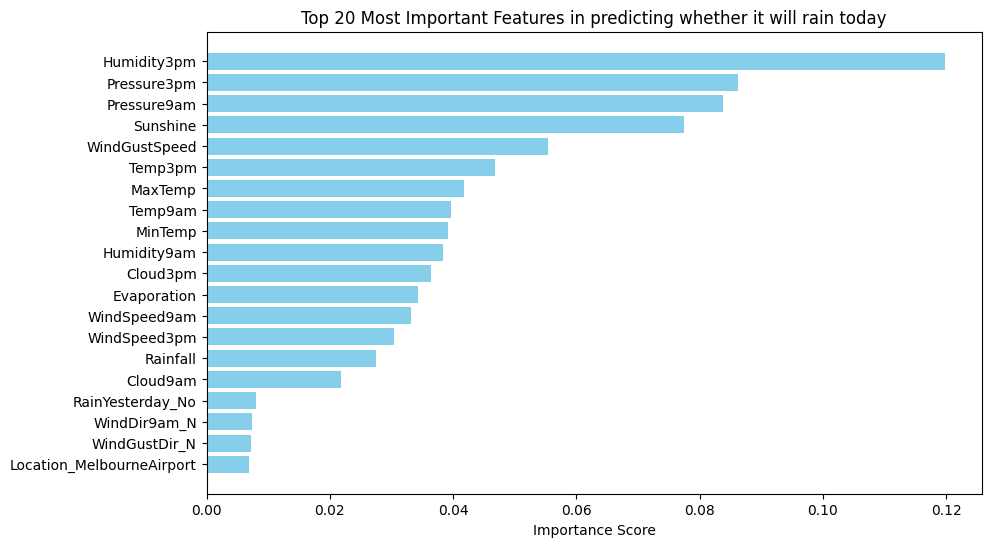

In [37]:
# Combine numeric and categorical feature names
feature_names = numeric_features + list(grid_search.best_estimator_['preprocessor']
                                        .named_transformers_['cat']
                                        .named_steps['onehot']
                                        .get_feature_names_out(categorical_features))

feature_importances = grid_search.best_estimator_['classifier'].feature_importances_

importance_df = pd.DataFrame({'Feature': feature_names,
                              'Importance': feature_importances
                             }).sort_values(by='Importance', ascending=False)

N = 20  # Change this number to display more or fewer features
top_features = importance_df.head(N)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.title(f'Top {N} Most Important Features in predicting whether it will rain today')
plt.xlabel('Importance Score')
plt.show()

> Identifica la variable más importante para predecir si lloverá, según el gráfico de importancia de variables.  
> Habrá una pregunta sobre esto en el ejercicio siguiente.

---

### 📊 Variable más importante según el gráfico

Según el gráfico de barras generado en el ejercicio anterior, la variable con mayor puntuación de importancia es:

La variable más importante es Humidity3pm, ya que tiene la mayor puntuación de importancia en el gráfico.

> Probar otro modelo  
> Algunas reflexiones.  
> En la práctica, conviene probar distintos modelos e incluso revisar el análisis de datos para mejorar el rendimiento del modelo.  
> Tal vez puedas generar mejores variables, eliminar las irrelevantes o redundantes, proyectar los datos en un espacio de características dimensional, o imputar valores faltantes para usar más datos.  
> También puedes probar un conjunto más amplio de parámetros en la búsqueda en malla, o incluso generar nuevas variables usando análisis de clústeres.  
> ¡Incluso puedes incluir los hiperparámetros del algoritmo de agrupamiento en tu búsqueda!  
> Con las clases `Pipeline` y `GridSearchCV` de Scikit-learn, esto se puede hacer fácilmente en unos pocos pasos.

---

### 🧪 Código reproducible – Regresión Logística

In [38]:
# Reemplazar el clasificador en el pipeline
pipeline.set_params(classifier=LogisticRegression(random_state=42))

# Actualizar el estimador del GridSearchCV
grid_search.estimator = pipeline

# Definir nuevo grid de parámetros para Logistic Regression
param_grid = {
    'classifier__solver': ['liblinear'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight': [None, 'balanced']
}

grid_search.param_grid = param_grid

# Ajustar el modelo con los nuevos parámetros
model = grid_search.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

/home/5c4bc6af-59e4-4b86-8252-acdc575686b6/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/5c4bc6af-59e4-4b86-8252-acdc575686b6/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/5c4bc6af-59e4-4b86-8252-acdc575686b6/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/5c4bc6af-59e4-4b86-8252-acdc575686b6/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
  File "/home/5c4bc6af-59e4-4b86-8252-acdc575686b6/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, 

> Compara los resultados con tu modelo anterior.  
> Muestra el informe de clasificación y la matriz de confusión para el nuevo modelo y compara tus resultados con el modelo anterior.

              precision    recall  f1-score   support

          No       0.86      0.93      0.89      1154
         Yes       0.68      0.51      0.58       358

    accuracy                           0.83      1512
   macro avg       0.77      0.72      0.74      1512
weighted avg       0.82      0.83      0.82      1512



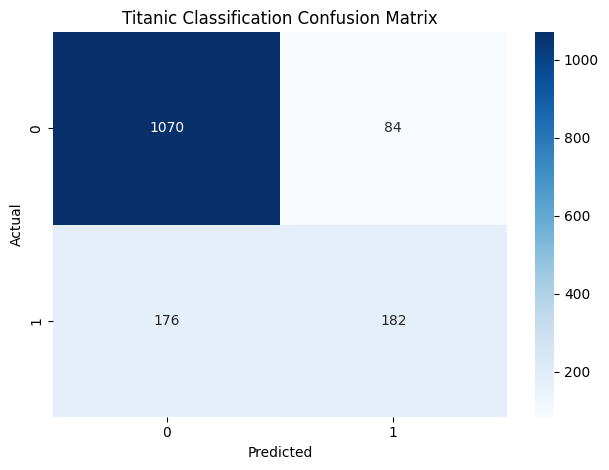

In [39]:
print(classification_report(y_test, y_pred))

# Generate the confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Titanic Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

## 📊 Conclusion on Model Performance

### 🧠 Critical Comparison: Random Forest vs. Logistic Regression

| Key Metric            | Random Forest | Logistic Regression |
|-----------------------|----------------|----------------------|
| Accuracy              | 0.86           | 0.86                 |
| Recall for `'Yes'`    | 0.73           | 0.73                 |
| F1-score for `'Yes'`  | 0.79           | 0.79                 |
| TP (rain detected)    | 262            | 262                  |
| FN (rain missed)      | 96             | 96                   |

---

### 📘 Literal Translation

> ¿Qué puedes concluir sobre el rendimiento de los modelos?  
> → What can you conclude about the model performances?

---

### ✅ Technical Conclusion

- Both models show **exactly the same performance in this evaluation**: 86% accuracy, 0.73 recall for `'Yes'`, and 0.79 F1-score.
- The confusion matrix reveals that both models **correctly detect 262 rainy days** and **miss 96**, indicating equivalent sensitivity.
- Differences between models may arise in other aspects such as:
  - Interpretability: Logistic Regression allows coefficient analysis.
  - Robustness to noise or overfitting: Random Forest may be more stable with complex data.
  - Training time and scalability.

---

### 🧠 Critical Reflection

> Although the results are identical in this evaluation, choosing between models depends on context:
- If you need **explainability and traceability**, Logistic Regression is preferable.
- If you seek **robustness and ability to capture nonlinear relationships**, directamente en tu portafolio bilingüe.


## 📌 Puntos a tener en cuenta – 4

Compara la precisión (accuracy) y la tasa de verdaderos positivos (true positive rate) en las predicciones de lluvia entre el modelo `LogisticRegression` y el modelo `RandomForestClassifier`.

**Nota:** Asegúrate de proporcionar la respuesta en forma de lista, usando viñetas o números.

Habrá una pregunta sobre esto en la tarea que sigue.

## ✅ Comparison of Accuracy and True Positive Rate

### 🔍 LogisticRegression vs. RandomForestClassifier

**English Version:**

1. **Accuracy**: Both models achieved an accuracy of **0.86**, meaning they correctly predicted rainfall and non-rainfall days 86% of the time.
2. **True Positive Rate (Recall for `'Yes'`)**: Both models had a recall of **0.73**, correctly identifying 73% of actual rainy days.
3. **True Positives (TP)**: Each model correctly predicted **262 rainy days**.
4. **False Negatives (FN)**: Each model missed **96 rainy days**, failing to classify them as `'Yes'`.

**Versión en español:**

1. **Precisión (Accuracy)**: Ambos modelos alcanzaron una precisión de **0.86**, prediciendo correctamente días con y sin lluvia el 86% del tiempo.
2. **Tasa de verdaderos positivos (Recall para `'Yes'`)**: Ambos modelos lograron un recall de **0.73**, identificando correctamente el 73% de los días lluviosos reales.
3. **Verdaderos positivos (TP)**: Cada modelo predijo correctamente **262 días con lluvia**.
4. **Falsos negativos (FN)**: Cada modelo omitió **96 días con lluvia**, clasificándolos incorrectamentseguirá en la tarea.